In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data= pd.read_csv('AirQualityUCI.csv')
data.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [2]:
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16']
data.drop(columns=columns_to_drop, inplace=True)
data.to_csv('airQuality.csv', index=False)

In [6]:
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [8]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [12]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data.isnull().sum()

Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64

In [16]:
date_columns = ['Date'] 
time_columns = ['Time'] 
data[date_columns] = pd.to_datetime(data[date_columns])
data[time_columns] = pd.to_datetime(data[time_columns])  

for col in date_columns + time_columns:
    if data[col].isnull().any():
        null_mask = data[col].isnull()
        random_dates = pd.to_datetime(np.random.randint(data[col].min().value, data[col].max().value, size=null_mask.sum()))
        data.loc[null_mask, col] = random_dates
        
data.isnull().sum()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [17]:
data.fillna(0, inplace=True)
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [33]:
def random_date():
    year = np.random.choice(range(2000, 2023))
    month = np.random.choice(range(1, 13))
    day = np.random.choice(range(1, 29))
    return f"{year}-{month:02d}-{day:02d}"

# Define a function to generate random times
def random_time():
    hour = np.random.choice(range(0, 24))
    minute = np.random.choice(range(0, 60))
    second = np.random.choice(range(0, 60))
    return f"{hour:02d}:{minute:02d}:{second:02d}"

# Replace zeros with random dates in a new column
data['random_date'] = data['Date'].apply(lambda x: random_date() if pd.isnull(x) or x == 0 else x)

# Replace zeros with random times in another new column
data['random_time'] = data['Time'].apply(lambda x: random_time() if pd.isnull(x) or x == 0 else x)

# Save the updated dataframe to a new file
data.to_csv('airQuality.csv', index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [19]:
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


C:\Users\sadman\AppData\Local\Temp\ipykernel_7384\4026914914.py:16: RuntimeWarning: invalid value encountered in divide
  X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
C:\Users\sadman\AppData\Local\Temp\ipykernel_7384\4026914914.py:17: RuntimeWarning: invalid value encountered in divide
  X_test_scaled = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)


Iteration    0: Cost nan
Iteration  500: Cost nan
Iteration 1000: Cost nan
Iteration 1500: Cost nan
Iteration 2000: Cost nan
Iteration 2500: Cost nan
Iteration 3000: Cost nan
Iteration 3500: Cost nan
Iteration 4000: Cost nan
Iteration 4500: Cost nan


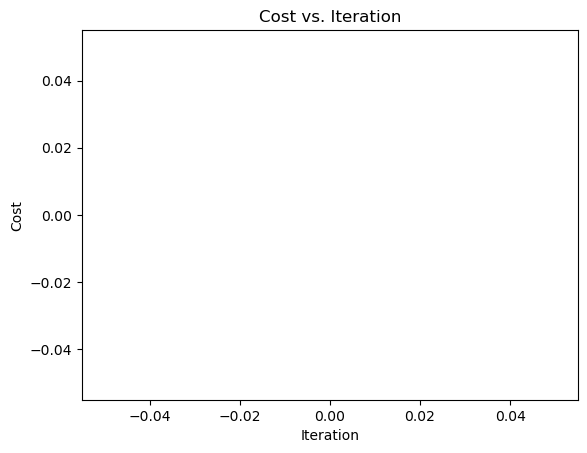

Test Mean Squared Error: nan


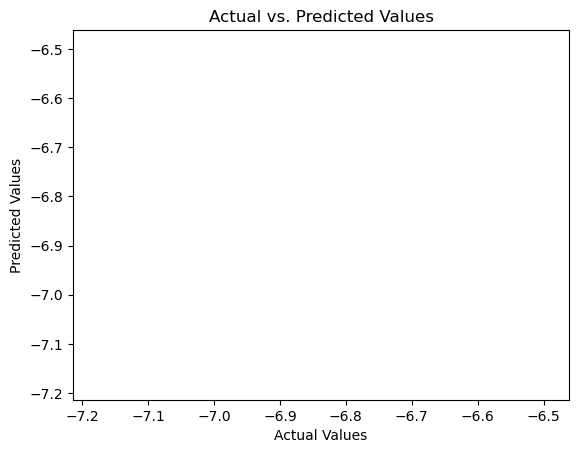

In [22]:
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Separate features (X) and target (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets (75% training, 25% testing)
split_index = int(0.75 * len(data))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Feature Scaling
X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_scaled = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Define functions for multivariate linear regression

def compute_cost(X, y, w, b):
    m = X.shape[0] 
    cost = np.sum((np.dot(X, w) + b - y) ** 2)
    return cost / (2 * m)

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dw = np.dot(X.T, (np.dot(X, w) + b - y)) / m
    db = np.sum(np.dot(X, w) + b - y) / m
    return dw, db

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = copy.deepcopy(w_init)
    b = b_init
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:0.2e}")
    return w, b, J_history

# Initialize parameters
w_init = np.zeros(X_train_scaled.shape[1])
b_init = 0

# Gradient Descent settings
iterations = 5000
learning_rate = 0.01

# Run Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train_scaled, y_train, w_init, b_init, learning_rate, iterations)

# Plot cost versus iteration
plt.plot(J_hist)
plt.title("Cost vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Test the model on the testing set
y_pred = np.dot(X_test_scaled, w_final) + b_final

# Calculate test performance (e.g., mean squared error)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Test Mean Squared Error: {mse}")

# Plot the predicted values vs. actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plot the 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [26]:
data = np.array(data)

# Split the data into training and testing sets
data_tr = data[:30]  # Training data
data_ts = data[30:]  # Testing data

# Extract features (x) and target (y) for training and testing
x_train = data_tr[:, :12]  # Features for training
y_train = data_tr[:, 12]   # Target for training
x_test = data_ts[:, :12]   # Features for testing
y_test = data_ts[:, 12]    # Target for testing

# Function to compute the cost (Mean Squared Error)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    cost = np.sum((f_wb - y) ** 2) / (2 * m)
    return cost

# Function to compute the gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    dj_dw = np.dot(x.T, (f_wb - y)) / m
    dj_db = np.sum(f_wb - y) / m
    return dj_dw, dj_db

# Gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:0.2e}")

    return w, b, J_history

# Initialize parameters
w_init = np.zeros(x_train.shape[1])  # Initialize weights to zeros
b_init = 0  # Initialize bias to zero

# Gradient descent settings
iterations = 5000
alpha = 0.01

# Run gradient descent for training
w_final, b_final, J_hist_train = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

# Compute predictions for training and testing
y_train_pred = np.dot(x_train, w_final) + b_final
y_test_pred = np.dot(x_test, w_final) + b_final

# Compute Mean Squared Error (MSE) for training and testing
mse_train = np.mean((y_train_pred - y_train) ** 2)
mse_test = np.mean((y_test_pred - y_test) ** 2)

print(f"Mean Squared Error (MSE) for training data: {mse_train}")
print(f"Mean Squared Error (MSE) for testing data: {mse_test}")

Iteration    0: Cost 1.43e+11
Iteration  500: Cost nan
Iteration 1000: Cost nan
Iteration 1500: Cost nan
Iteration 2000: Cost nan
Iteration 2500: Cost nan
Iteration 3000: Cost nan
Iteration 3500: Cost nan
Iteration 4000: Cost nan
Iteration 4500: Cost nan
Mean Squared Error (MSE) for training data: nan
Mean Squared Error (MSE) for testing data: nan


C:\Users\sadman\AppData\Local\Temp\ipykernel_7384\1849881827.py:17: RuntimeWarning: overflow encountered in square
  cost = np.sum((f_wb - y) ** 2) / (2 * m)
C:\Users\sadman\AppData\Local\Temp\ipykernel_7384\1849881827.py:36: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * dj_dw
